In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('mail_data.csv')

In [3]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.shape

(5572, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [7]:
df['Category'].value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

In [8]:
df.duplicated().sum()

415

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum()

0

In [11]:
df.columns

Index(['Category', 'Message'], dtype='object')

In [12]:
df['Category'].value_counts()

Category
ham     4516
spam     641
Name: count, dtype: int64

# Label Encoding

In [13]:
from pickle import encode_long
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder() 

In [14]:
df['Category'] = encoder.fit_transform(df['Category'])

<Axes: ylabel='Frequency'>

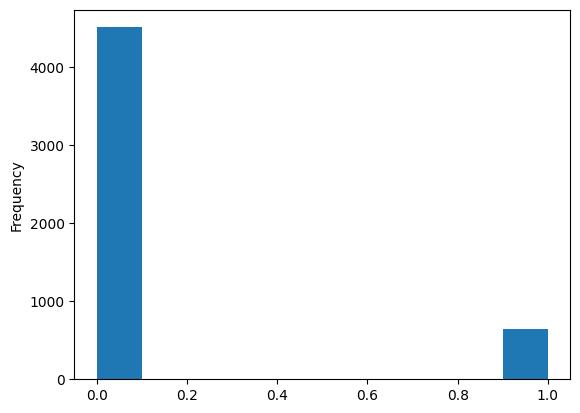

In [15]:
df['Category'].plot(kind='hist')

# PreProcessing

In [16]:
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt_tab')

stop_words = set(stopwords.words('english'))
punctuations = string.punctuation


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [17]:
def preprocess(text):
  text = text.lower()
  text = word_tokenize(text)
  text = [word for word in text if word not in stop_words]
  text = [word for word in text if word not in punctuations]
  text = [word for word in text if word.isalpha()]
  text = ' '.join(text)
  return text



In [18]:
df['Message'] = df['Message'].apply(preprocess )

# X and y

In [19]:
X = df['Message']
y = df['Category']

In [20]:
X.shape

(5157,)

In [21]:
y.shape

(5157,)

# Train Test Split

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
X_train.shape

(4125,)

In [24]:
y_train.shape

(4125,)

# Vectorization

In [25]:
from  sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

In [26]:
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Balancing the Imbalance dataset

In [27]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_vec, y_train)


In [28]:
X_train.shape

(4125,)

In [29]:
X_train_res.shape

(7240, 6347)

In [30]:
y_train.value_counts()

Category
0    3620
1     505
Name: count, dtype: int64

In [31]:
y_train_res.value_counts()

Category
0    3620
1    3620
Name: count, dtype: int64

In [32]:
X_train.duplicated().sum()

87

In [33]:
y_train_res

0       0
1       0
2       0
3       0
4       0
       ..
7235    1
7236    1
7237    1
7238    1
7239    1
Name: Category, Length: 7240, dtype: int32

In [34]:
y_train.value_counts()

Category
0    3620
1     505
Name: count, dtype: int64

In [35]:
y_train_res.value_counts()

Category
0    3620
1    3620
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

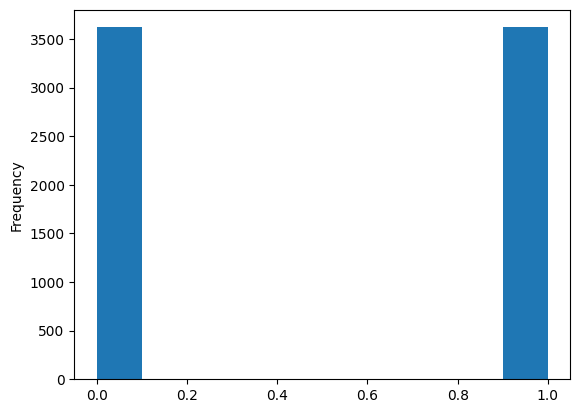

In [36]:
y_train_res.plot(kind = 'hist')

# Applying Model

In [37]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest
model = RandomForestClassifier(max_depth= None, max_features = 'log2', min_samples_leaf = 1, min_samples_split = 10, n_estimators = 300,random_state=42)

# Train the model
model.fit(X_train_res, y_train_res)

RandomForestClassifier(max_features='log2', min_samples_split=10,
                       n_estimators=300, random_state=42)

# Predictions

In [38]:
# Predictions
y_pred = model.predict(X_test_vec)

# Accuracy

In [39]:
from sklearn.metrics import accuracy_score
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.9844961240310077


# Confusion Matrix

In [40]:
# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

NameError: name 'confusion_matrix' is not defined

# Classification Report

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Best tuned model directly
model = RandomForestClassifier(
    max_depth=None,
    max_features='log2',
    min_samples_leaf=1,
    min_samples_split=10,
    n_estimators=300,
    random_state=42
)

# Train
model.fit(X_train_res, y_train_res)

# Predict
y_pred = model.predict(X_test_vec)

# Evaluate
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


# Saving the Model 

In [ ]:
import pickle

# Save model
pickle.dump(model, open("model.pkl", "wb"))


# Saving the Vectorizer

In [ ]:
# Save vectorizer
pickle.dump(vectorizer, open("vectorizer.pkl", "wb"))